# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [4]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [5]:
# Loading the dataset
df = pd.read_csv('./kaggle_movie_train.csv')

# **Exploring the dataset**

In [6]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [7]:
df.shape

(22579, 3)

In [8]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [2]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

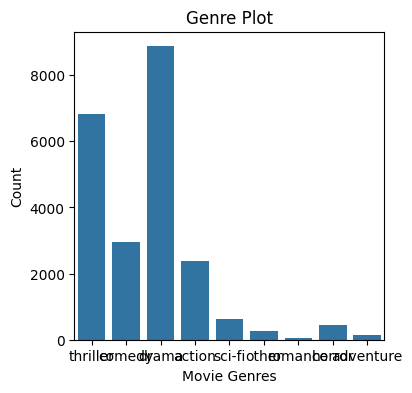

In [ ]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(4,4))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [10]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [12]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [13]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [14]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [15]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Amad
[nltk_data]     Irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.shape

(22579, 2)

In [20]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [21]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [22]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [23]:
len(corpus)

22579

In [24]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

In [11]:
print(drama_words)
print(action_words)
print(comedy_words)

NameError: name 'drama_words' is not defined

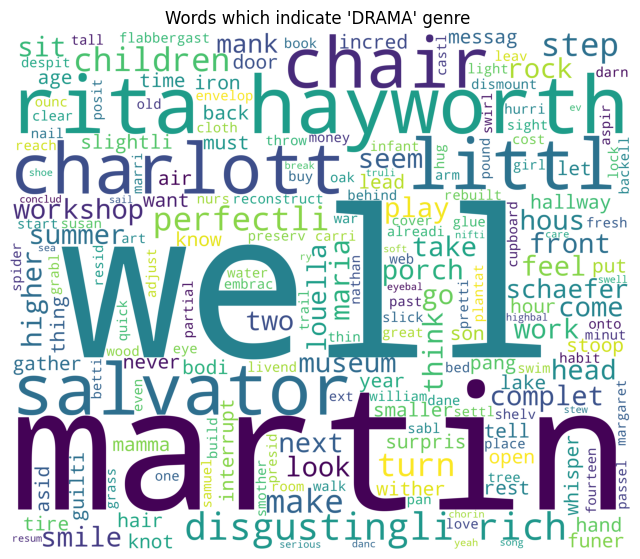

In [25]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

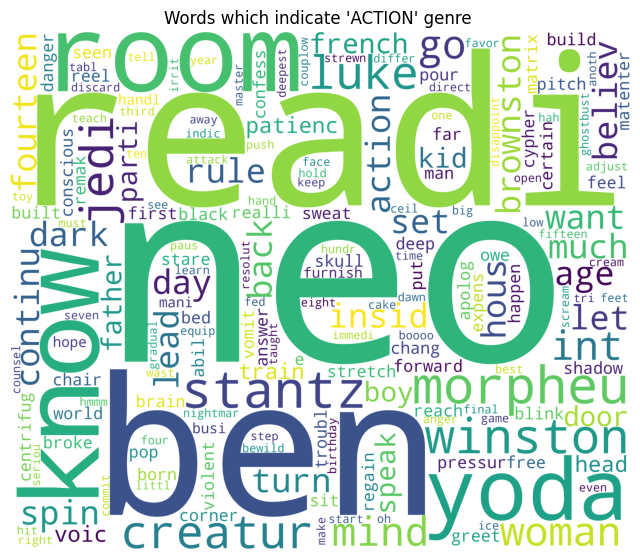

In [26]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

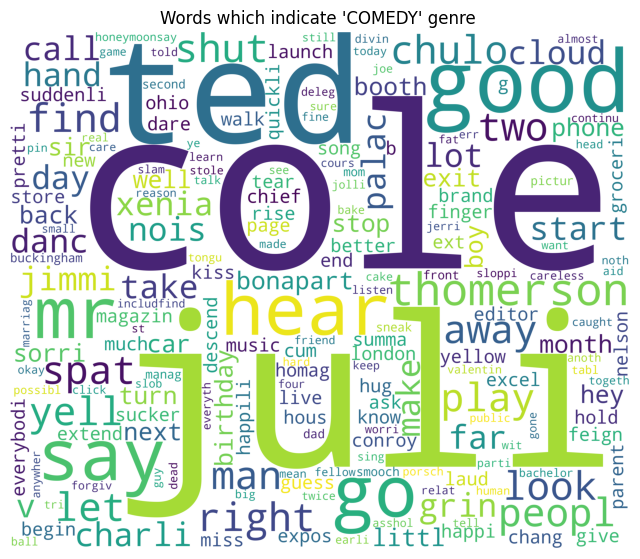

In [27]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [28]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [29]:
y = df['genre'].values

# **Model Building**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [31]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [35]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
accuracy_score = accuracy_score(y_test, nb_y_pred)
recall_score = recall_score(y_test, nb_y_pred, average='micro')
f1_score = f1_score(y_test, nb_y_pred, average='micro')
precision_score = precision_score(y_test, nb_y_pred, average='micro')
print("---- Score ----")
print("Accuracy score is: {}%".format(round(accuracy_score*100,2)))
print("recall score is: {}%".format(round(recall_score*100,2)))
print("f1 score is: {}%".format(round(f1_score*100,2)))
print("precision score is: {}%".format(round(precision_score*100,2)))

---- Score ----
Accuracy score is: 89.57%
recall score is: 89.57%
f1 score is: 89.57%
precision score is: 89.57%


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [37]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   41,    1,   37, 1607,   21,    2,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    1,    7,    1,    0,  114,    7],
       [   0,   14,    0,   21,   78,   12,    0,   22, 1171]])

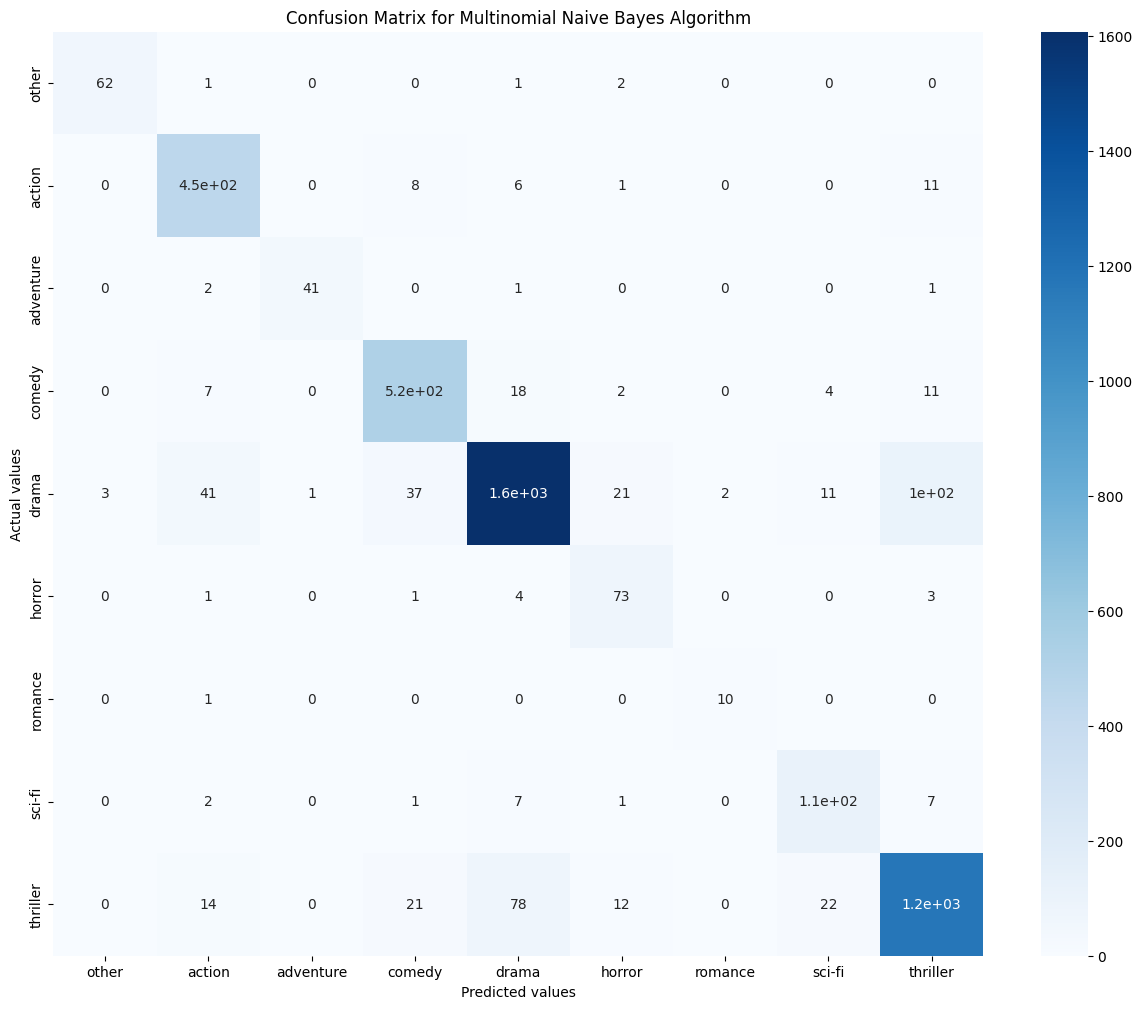

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [40]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  # score = accuracy_score(y_test, temp_y_pred)
  # print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
#   if score>best_accuracy:
#     best_accuracy = score
#     alpha_val = i
# print('--------------------------------------------')
# print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

In [33]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# **Predictions**

In [0]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [0]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('./kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: OUS It's a monstrous floating city. Off in the distance is a blue and green planet, not unlike Earth. We hear a RINGING SOUND. INT. PEREZ CABIN CONTINUOUS DIETER PEREZ rolls over and clicks on a light. He fumbles for a button, presses it. Lowe inserts a data disk into the comm unit. PEREZ Lowe, you bastard. TV cover Lowe???? LOWE We hit the mother load. PEREZ Do you know what time it is? LOWE We're six parsecs away. How the hell do I know what time it is. We just hit a goldmine. PEREZ A box of DVD's isn't a gold mine. I told you, I can't move 'em. LOWE Just look at the file. Perez' computer DINGS, signaling the completion of the download. Perez looks at the readout. BACK TO LOWE'S CABIN PEREZ Two 400 year old frozen specimens. One well preserved. And, are you ready for this, one up and walking around. LOWE What? How much? PEREZ Enough to keep us in whisky and hookers til your liver rots and our peckers fall off. LOWE How much? PEREZ A large fortune. LOWE I got him frozen right 

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  delivers a stirring rendition. The class thinks she's crazy. Peggy's decided to have a good time. Announcements begin over the PA system. No one pays attention, except Peggy. MAN'S VOICE V.0. Good morning, students. This is Mr. Mosey. Our girls diving team is competing today in the county finals at Commander Beck High School. We know they'll put forth a splendid effort so let's wish them luck. PEGGY Where's Rosalie Testa? CAROL Probably at the diving meet. MAN'S VOICE V.0. Finally, congratulations go to Richard Norvik for placing first in the Statewide Math Contest. We're proud of you, Richard....That's all, students. Several students boo Richard's name. The BELL RINGS. INT. ANOTHER CLASSROOM Maddy, Dolores and Peggy enter the room. Peggy stands at the door till most are seated. She sees an empty seat between Maddy and Dolores and, assuming it's hers, sits down. DOLORES Did you study for the test? PEGGY horrified Test? INT. CLASSROOM TWENTY MINUTES LATER MR. SNELGROVE, an offi

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: se Mom, look, just don't worry...ok? END FLASHBACK INT. CHARLIE'S MOTHER'S BEDROOM MORNING CHARLIE and JOHNNY BOY are lying on CHARLIE'S MOTHER'S bed in their underwear. CHARLIE You'd better make a move kid. He thinks you're trying to screw him. JOHNNY BOY Wouldn't bother me. CHARLIE Yeah, big man...get yourself in more trouble. You make a fool out of him, you're doing the same to me. I signed for you don't forget. JOHNNY BOY Don't worry. I can handle it. 24. CHARLIE You couldn't handle shit. You just better come through with some kind of payment on Tuesday...anything. Understand? Hold onto your pay check this week. JOHNNY BOY laughs There won't be any this week. CHARLIE What do you mean? JOHNNY BOY Didn't show up. CHARLIE You sick or what? You forget what we had to do to get you on the trucks, stupid? JOHNNY BOY I don't like loading crates. CHARLIE You're not supposed to like it. What gets me is your attitude. Listen... tomorrow you show up. JOHNNY BOY What about your attitude

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: enkman. They took the astronomer Phileas and staked his head to the town gate. EXT. COLUMBIA UNIVERSITY DAY A LITTLE LATER Stantz and Venkman are sitting on a bench both looking desolate. STANTZ shaking his head This is like a major disgrace. Forget M.I.T. or Stanford now ... they wouldn't touch us with a three meter cattle prod. VENKMAN You're always so worried about your reputation. We don't need the University. Einstein did his best stuff while he was working as a patent clerk.'They can't stop progress. STANTZ not cheered Do you know what a patent clerk makes? I liked the University. They gave us money, they gave us the facilities and we didn't have to produce anything! I've worked in the private sector. They expect results. You've never been out of college. You don't know what it's like out there. VENKMAN with visionary zeal Let me tell you, Ray, everything in life happens for a reason. Call it fate, call it luck, Karma, whatever. I think we were destined to get kicked out 

In [50]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  the interests of France, I have the pleasure of giving him the greatest proof of attachment and devotedness that was ever given on earth... She cannot continue, and breaks down completely. Eugene and Hortense comfort her. Hortense is crying, too. But the Bonaparte family watch the proceedings, unmoved. They have never forgiven Josephine. Napoleon is pale and shaken. He whispers to an official, Regnault de Saint Jean d'Angely, who picks up Josephine's speech from the floor. He reads the speech to the accompaniment of Josephine's tears. D'ANGELY I respond to all the sentiments of the Emperor in consenting to the dissolution of a marriage which is now an obstacle to the happiness of France, be depriving it of the blessing of being, one day, governed by the descendants of that great man, who was evidently raised up by providence to efface the evils of a terrible revolution, and to restore the altar, the throne and social order. EXT. MALMAISON GARDEN DAY Napoleon and Josephine walk